In [1]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 加载数据集
def load_data(data_path):
    points = np.loadtxt(data_path)
    return points

In [3]:
data = load_data('../know_user_kmeans.txt')
print(data.shape)

(112, 4163)


In [4]:
data_MDS = MDS(n_components=2).fit_transform(data)

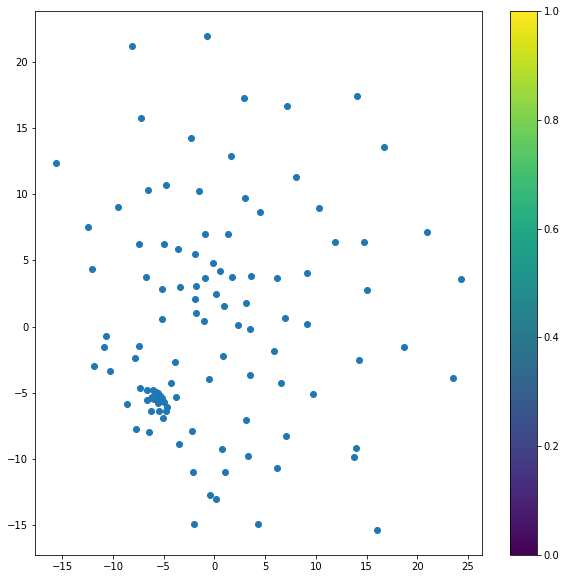

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(2)
plt.scatter(data_MDS[:, 0], data_MDS[:, 1])
plt.colorbar()#使用这一句就可以分辨出，颜色对应的类了！神奇啊。
plt.show()

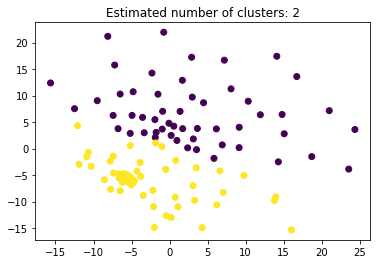

In [9]:
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(data_MDS)
plt.scatter(data_MDS[:, 0], data_MDS[:, 1], c=y_pred)
plt.title('Estimated number of clusters: %d' % len(set(y_pred)))
plt.savefig('img/MDS_K-MEANS.svg',dpi=1000) #指定分辨率保存
plt.show()

In [7]:
# 评价
from evaluation import E

e = E(data, y_pred)

DBI: 2.2028377812036783


In [8]:
def cal_sp(data, predict):
    x_count = 0
    y_count = 0
    x = 0
    y = 0
    for i in range(len(predict)):
        if predict[i] == 0:
            x_count += 1
            x += data[i]
        elif predict[i] == 1:
            y_count += 1
            y += data[i]
    print(x/x_count)
    print(y/y_count)
    
        
    for i in range(len(predict)):
        cp_x = 0
        cp_y = 0
        if predict[i] == 0:
             cp_x += (data[i] - x)
        cp_x = cp_x/x_count
        if predict[i] == 1:
            cp_y += (data[i] - y)
        cp_y = cp_y/y_count
        cp = (cp_x + cp_y).sum()/2
    print('cp',cp)
    print('sp',((x/x_count-y/y_count)**2).sum())    
cal_sp(data_MDS, y_pred)

[3.00267935 6.67185179]
[-2.69732213 -5.99335839]
cp 4.244992349544496
sp 192.89756577992674
